In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [8]:
X = df.drop(columns=['not.fully.paid'])
Y = df[['not.fully.paid']]

In [9]:
X

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [11]:
Y

,not.fully.paid
0,0
1,0
2,0
3,0
4,0
...,...
9573,1
9574,1
9575,1
9576,1


In [53]:
cat = list(X.columns[X.dtypes==object])
con = list(X.columns[X.dtypes!=object])

In [54]:
cat

['purpose']

In [14]:
con

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'not.fully.paid']

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [56]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [57]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [58]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [59]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__credit.policy,num__int.rate,num__installment,num__log.annual.inc,num__dti,num__fico,num__days.with.cr.line,num__revol.bal,num__revol.util,num__inq.last.6mths,num__delinq.2yrs,num__pub.rec,cat__purpose_all_other,cat__purpose_credit_card,cat__purpose_debt_consolidation,cat__purpose_educational,cat__purpose_home_improvement,cat__purpose_major_purchase,cat__purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.3, random_state=42)

In [65]:
xtrain.head()

,num__credit.policy,num__int.rate,num__installment,num__log.annual.inc,num__dti,num__fico,num__days.with.cr.line,num__revol.bal,num__revol.util,num__inq.last.6mths,num__delinq.2yrs,num__pub.rec,cat__purpose_all_other,cat__purpose_credit_card,cat__purpose_debt_consolidation,cat__purpose_educational,cat__purpose_home_improvement,cat__purpose_major_purchase,cat__purpose_small_business
4922,0.492222,-0.161668,0.955279,0.476798,0.676000,0.557137,0.528369,-0.493505,-1.554454,-0.716989,-0.299730,3.578150,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7935,-2.031603,-0.388893,-0.351392,-1.673165,-1.038217,-0.891430,-1.321999,-0.373402,0.134449,2.464641,-0.299730,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1434,0.492222,0.289058,-0.889737,-0.858606,0.028084,-1.154806,1.429523,-0.299841,-0.530772,0.646567,3.362023,-0.237003,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6687,0.492222,1.909436,2.613973,1.333525,0.347684,-1.023118,2.066355,-0.300848,-0.654855,-0.716989,5.192900,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2579,0.492222,-0.020117,-0.961793,-1.013637,-1.744242,0.162073,-0.036370,-0.498422,-1.551008,0.192048,-0.299730,-0.237003,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
ytrain.head()

,not.fully.paid
4922,0
7935,1
1434,0
6687,0
2579,0


In [67]:
xtest.head()

,num__credit.policy,num__int.rate,num__installment,num__log.annual.inc,num__dti,num__fico,num__days.with.cr.line,num__revol.bal,num__revol.util,num__inq.last.6mths,num__delinq.2yrs,num__pub.rec,cat__purpose_all_other,cat__purpose_credit_card,cat__purpose_debt_consolidation,cat__purpose_educational,cat__purpose_home_improvement,cat__purpose_major_purchase,cat__purpose_small_business
8558,-2.031603,1.186785,0.649233,-0.545694,0.277953,-1.418182,-0.300692,-0.247937,1.220173,0.646567,-0.299730,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4629,0.492222,-0.161668,1.035304,0.364575,-0.249386,0.557137,-0.384799,-0.028795,-0.203331,0.646567,-0.299730,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1383,0.492222,-0.299493,-0.586009,-0.949841,0.163188,-0.496366,-0.997600,-0.081766,1.344256,-0.716989,-0.299730,-0.237003,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8142,-2.031603,1.563011,-1.028344,0.113834,2.259472,-1.023118,0.768694,-0.268645,-0.723790,1.101085,1.531147,-0.237003,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1768,0.492222,-0.020117,-0.768710,0.317519,-1.251767,-0.232991,0.191939,-0.487224,-1.364884,-0.262470,1.531147,-0.237003,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
xtrain.head()

,num__credit.policy,num__int.rate,num__installment,num__log.annual.inc,num__dti,num__fico,num__days.with.cr.line,num__revol.bal,num__revol.util,num__inq.last.6mths,num__delinq.2yrs,num__pub.rec,cat__purpose_all_other,cat__purpose_credit_card,cat__purpose_debt_consolidation,cat__purpose_educational,cat__purpose_home_improvement,cat__purpose_major_purchase,cat__purpose_small_business
4922,0.492222,-0.161668,0.955279,0.476798,0.676000,0.557137,0.528369,-0.493505,-1.554454,-0.716989,-0.299730,3.578150,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7935,-2.031603,-0.388893,-0.351392,-1.673165,-1.038217,-0.891430,-1.321999,-0.373402,0.134449,2.464641,-0.299730,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1434,0.492222,0.289058,-0.889737,-0.858606,0.028084,-1.154806,1.429523,-0.299841,-0.530772,0.646567,3.362023,-0.237003,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6687,0.492222,1.909436,2.613973,1.333525,0.347684,-1.023118,2.066355,-0.300848,-0.654855,-0.716989,5.192900,-0.237003,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2579,0.492222,-0.020117,-0.961793,-1.013637,-1.744242,0.162073,-0.036370,-0.498422,-1.551008,0.192048,-0.299730,-0.237003,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [70]:
dct = {'Logistic' : LogisticRegression(),
       'Decision tree' : DecisionTreeClassifier(),
       'random forest' : RandomForestClassifier(),
       'GBC' : GradientBoostingClassifier(),
       'SVC' : SVC(),
       'KNN' : KNeighborsClassifier()}

In [71]:
dct.items()

dict_items([('Logistic', LogisticRegression()), ('Decision tree', DecisionTreeClassifier()), ('random forest', RandomForestClassifier()), ('GBC', GradientBoostingClassifier()), ('SVC', SVC()), ('KNN', KNeighborsClassifier())])

In [72]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [77]:
tr = []
tr_cv = []
ts = []
for name, model in dct.items():
    # Fit the model
    model.fit(xtrain, ytrain)
    # Predict results for train and test
    ypred_tr = model.predict(xtrain)
    ypred_ts = model.predict(xtest)
    # Calculate f1 score in train and test
    f1_tr = f1_score(ytrain, ypred_tr)
    f1_ts = f1_score(ytest, ypred_ts)
    # 5 - fold cross validation on training
    scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring='f1_macro')
    f1_cv = scores.mean()
    # Append above results in tr, ts, tr_cv
    tr.append(f1_tr)
    ts.append(f1_ts)
    tr_cv.append(f1_cv)
    # Print above results for each model
    print(f'Model name : {name}\n')
    print(f'Train F1 : {f1_tr:.4f}')
    print(f'Train F1 Cross Validated : {f1_cv:.4f}')
    print(f'Test F1 : {f1_ts:.4f}')
    print('\n=========================================================================\n')

Model name : Logistic

Train F1 : 0.0445
Train F1 Cross Validated : 0.4786
Test F1 : 0.0606


Model name : Decision tree

Train F1 : 1.0000
Train F1 Cross Validated : 0.5404
Test F1 : 0.1927


Model name : random forest

Train F1 : 0.9995
Train F1 Cross Validated : 0.4761
Test F1 : 0.0448


Model name : GBC

Train F1 : 0.1678
Train F1 Cross Validated : 0.4898
Test F1 : 0.0523


Model name : SVC

Train F1 : 0.0511
Train F1 Cross Validated : 0.4603
Test F1 : 0.0211


Model name : KNN

Train F1 : 0.2916
Train F1 Cross Validated : 0.5031
Test F1 : 0.1119




In [82]:
list(dct.keys())

['Logistic', 'Decision tree', 'random forest', 'GBC', 'SVC', 'KNN']

In [83]:
results_dct = {'Model_name' : list(dct.keys()),
               'Train F1':tr,
               'Test F1':ts,
               'Train F1 CV':tr_cv}

In [84]:
results_df = pd.DataFrame(results_dct)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
0,Logistic,0.044524,0.060606,0.478599
1,Decision tree,1.000000,0.192670,0.540373
2,random forest,0.999531,0.044807,0.476090
3,GBC,0.167808,0.052314,0.489783
4,SVC,0.051095,0.021097,0.460284
5,KNN,0.291605,0.111888,0.503108


In [86]:
results_df = results_df.sort_values(by='Test F1', ascending=False)
results_df

,Model_name,Train F1,Test F1,Train F1 CV
1,Decision tree,1.000000,0.192670,0.540373
5,KNN,0.291605,0.111888,0.503108
0,Logistic,0.044524,0.060606,0.478599
3,GBC,0.167808,0.052314,0.489783
2,random forest,0.999531,0.044807,0.476090
4,SVC,0.051095,0.021097,0.460284


Choosing Decision tree

In [87]:
model = DecisionTreeClassifier(max_depth=1, min_samples_split=5, min_samples_leaf=3, criterion='entropy')

In [88]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=3,
                       min_samples_split=5)

In [89]:
model.score(xtrain, ytrain)

0.8408412887828163

In [90]:
model.score(xtest, ytest)

0.83785664578984

In [91]:
params = {'max_depth':[1, 2, 3, 4, 5, 6, 7],
          'min_samples_split':[5, 6, 7, 8, 9],
          'criterion':['gini', 'entropy']}

In [92]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [5, 6, 7, 8, 9]},
             scoring='f1_macro')

In [93]:
gscv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 8}

In [94]:
gscv.best_score_

0.49299332048369376

In [95]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(max_depth=7, min_samples_split=8)

In [96]:
best_dtc.score(xtrain, ytrain)

0.858890214797136

In [97]:
best_dtc.score(xtest, ytest)

0.8281141266527487

In [98]:
ypred_tr = best_dtc.predict(xtrain)
ypred_ts = best_dtc.predict(xtest)

In [99]:
ypred_tr[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [100]:
ytrain.head()

,not.fully.paid
4922,0
7935,1
1434,0
6687,0
2579,0


In [101]:
best_dtc.classes_

array([0, 1], dtype=int64)

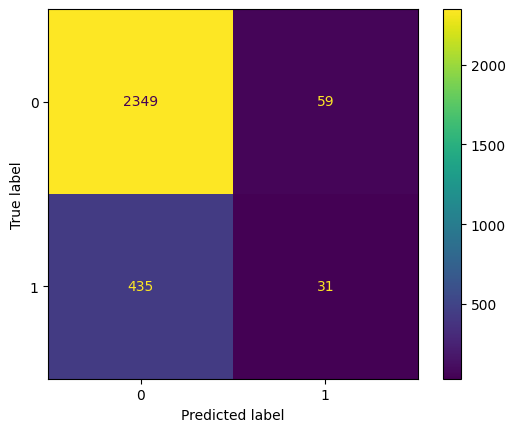

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()

In [103]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90      2408
           1       0.34      0.07      0.11       466

    accuracy                           0.83      2874
   macro avg       0.59      0.52      0.51      2874
weighted avg       0.76      0.83      0.78      2874



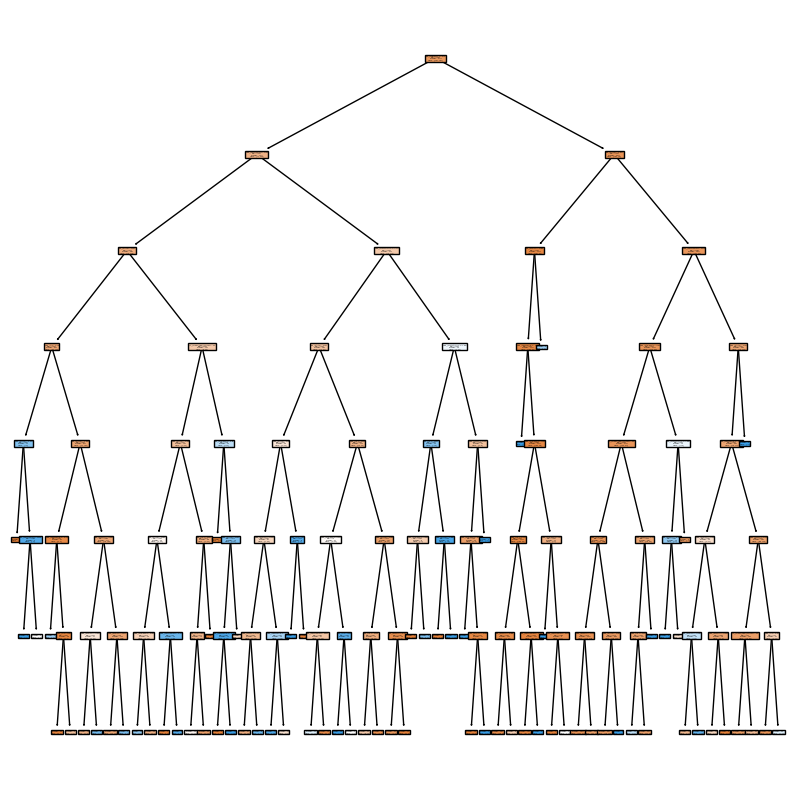

In [104]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(best_dtc, feature_names=list(xtrain.columns), filled=True)
plt.show()